In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path
import os

# import custom functions from src folder
module_path = str(Path.cwd() / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from robot import Robot

In [2]:
color = ["#e41a1c", "#377eb8"]

In [3]:
myRobot = Robot(seed=24)
myRobot.vary_a1 = True
myRobot.k_red = 7
traindata = myRobot.simulate(50000, black_box=False)
valdata = myRobot.simulate(5000, black_box=False)
caldata = myRobot.simulate(2000, black_box=False)

In [4]:
traindata

,color,x1,x2,a1,a2,r1,r2
0,red,5.114118,-9.443881,4.931186,1.767162,10.914098,3
1,red,-0.832588,-10.976522,4.457065,0.714897,8.565476,3
2,blue,7.025763,3.041488,0.132496,2.372398,9.521404,3
3,red,-8.434296,-7.836113,3.670530,0.990666,9.591529,3
4,blue,9.010706,-0.037929,5.957140,1.253436,7.611960,3
...,...,...,...,...,...,...,...
49995,red,14.249008,4.775329,0.280722,0.215234,12.083463,3
49996,red,0.742700,12.448826,1.311867,0.966979,10.520640,3
49997,blue,-6.760000,1.827825,2.486648,2.045702,7.846349,3
49998,blue,-10.698057,-5.330680,3.438161,0.717081,9.527691,3


<Axes: xlabel='x1', ylabel='x2'>

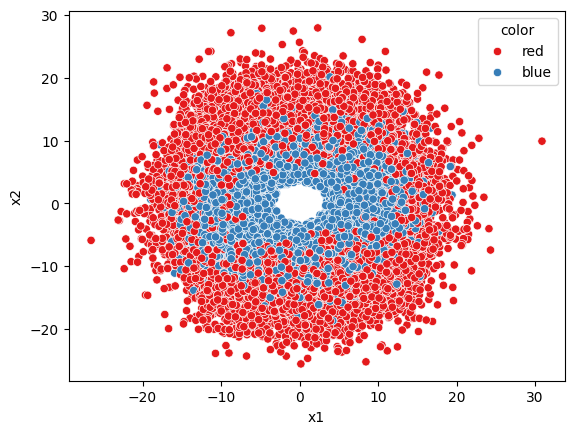

In [5]:
sn.scatterplot(traindata, x="x1", y="x2", hue="color", palette=color)

<Axes: xlabel='r1', ylabel='Count'>

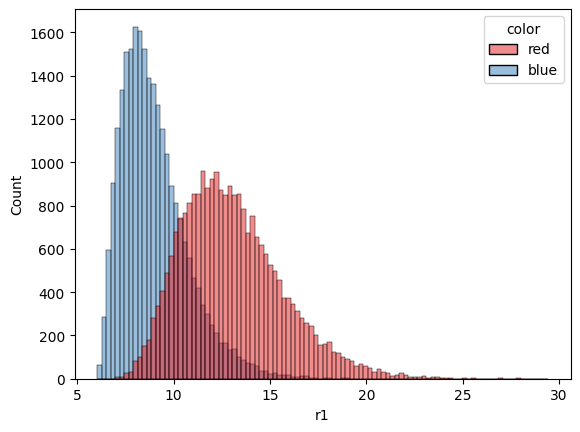

In [6]:
sn.histplot(traindata, x="r1", hue="color", palette=color)

<Axes: xlabel='a1', ylabel='Count'>

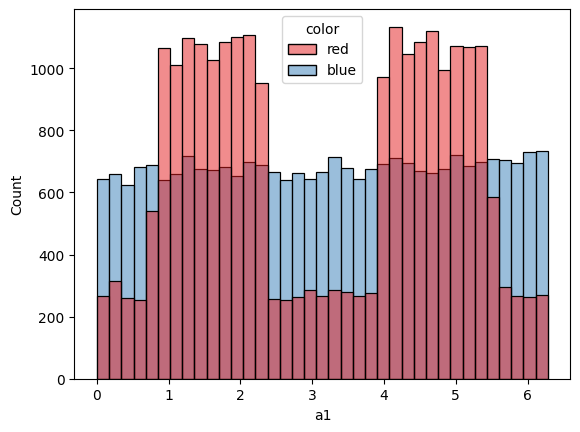

In [7]:
sn.histplot(traindata, x="a1", hue="color", palette=color)

<Axes: xlabel='x1', ylabel='Count'>

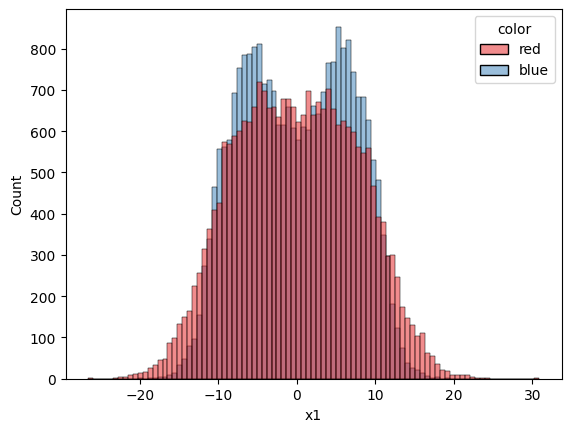

In [8]:
sn.histplot(traindata, x="x1", hue="color", palette=color)

<Axes: xlabel='x2', ylabel='Count'>

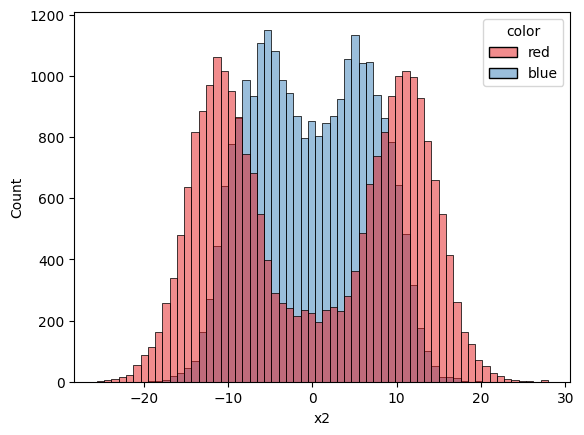

In [9]:
sn.histplot(traindata, x="x2", hue="color", palette=color)

In [10]:
params = myRobot.get_parameters()
params

{'seed': 24, 'R2': 3, 'k_red': 7, 'k_blue': 3, 'scale': 1, 'vary_a1': True}

In [11]:
# Convert to polar coordinates
def cartesian_to_polar(df, x_key, y_key, r_key, theta_key):
    df[r_key] = np.sqrt(df[x_key]**2 + df[y_key]**2)
    df[theta_key] = np.arctan(df[y_key]/df[x_key])
    #Get angles in range 0, 2pi
    df_copy = df.copy()
    mask1 = df_copy[x_key] < 0
    df.loc[mask1, theta_key] = df[theta_key] + np.pi
    df_copy = df.copy()
    mask2 = df_copy[theta_key] < 0
    df.loc[mask2, theta_key] = df[theta_key] + 2*np.pi
    return df

def polar_to_cartesian(df, x_key, y_key, r_key, theta_key):
    df[x_key] = df[r_key]*np.cos(df[theta_key])
    df[y_key] = df[r_key]*np.sin(df[theta_key])
    return df
#traindata = cartesian_to_polar(traindata, "x1", "x2", "r_x", "a_x")
#traindata = polar_to_cartesian(traindata, "x1_test", "x2_test", "r_x", "a_x")
#sn.histplot(traindata, x="a_x")

In [16]:
# Save data only if it does not already exist
def save_file(df, filename):
    if os.path.isfile(filename):
        print("File already exists. To replace, manually override.")
    else:
        df.to_csv(filename, index=False)

traindata = cartesian_to_polar(traindata, "x1", "x2", "r_x", "a_x")
valdata = cartesian_to_polar(valdata, "x1", "x2", "r_x", "a_x")
caldata = cartesian_to_polar(caldata, "x1", "x2", "r_x", "a_x")

trainfile = f'data/train_n_{len(traindata)}_kr{params["k_red"]}_kb{params["k_blue"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv'
save_file(traindata, trainfile)
valfile = f'data/val_n_{len(valdata)}_kr{params["k_red"]}_kb{params["k_blue"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv'
save_file(valdata, valfile)
calfile = f'data/cal_n_{len(caldata)}_kr{params["k_red"]}_kb{params["k_blue"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv'
save_file(caldata, calfile)

In [17]:
traindata

,color,x1,x2,a1,a2,r1,r2,r_x,a_x
0,red,5.114118,-9.443881,4.931186,1.767162,10.914098,3,10.739697,5.208704
1,red,-0.832588,-10.976522,4.457065,0.714897,8.565476,3,11.008053,4.636682
2,blue,7.025763,3.041488,0.132496,2.372398,9.521404,3,7.655847,0.408547
3,red,-8.434296,-7.836113,3.670530,0.990666,9.591529,3,11.512689,3.890242
4,blue,9.010706,-0.037929,5.957140,1.253436,7.611960,3,9.010785,6.278976
...,...,...,...,...,...,...,...,...,...
49995,red,14.249008,4.775329,0.280722,0.215234,12.083463,3,15.027907,0.323370
49996,red,0.742700,12.448826,1.311867,0.966979,10.520640,3,12.470961,1.511207
49997,blue,-6.760000,1.827825,2.486648,2.045702,7.846349,3,7.002752,2.877519
49998,blue,-10.698057,-5.330680,3.438161,0.717081,9.527691,3,11.952597,3.603867


<Axes: xlabel='x1', ylabel='x2'>

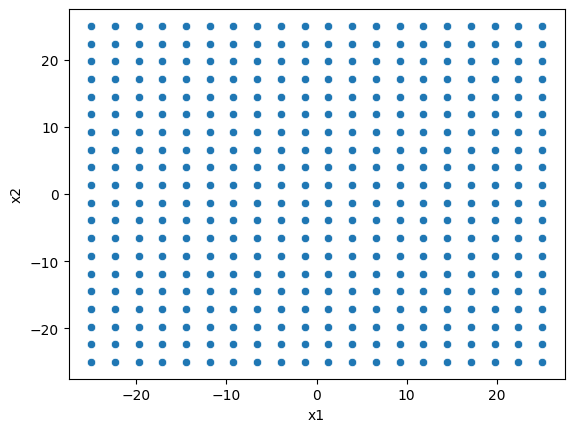

In [18]:
#Make grid for testing against analytical solution
nx = 20
x1 = np.linspace(-25, 25, nx)
x2 = np.linspace(-25, 25, nx)
xx1, xx2 = np.meshgrid(x1, x2)
grid_df = pd.DataFrame(columns = ["x1", "x2"], index = range(len(xx1.flatten())))
grid_df["x1"] = xx1.flatten()
grid_df["x2"] = xx2.flatten()
grid_df = cartesian_to_polar(grid_df, "x1", "x2", "r_x", "a_x")
sn.scatterplot(grid_df, x="x1", y="x2")
#grid_df.to_csv(f'data/x1_x2_grid_{nx}x{nx}.csv')

190


<Axes: xlabel='x1', ylabel='x2'>

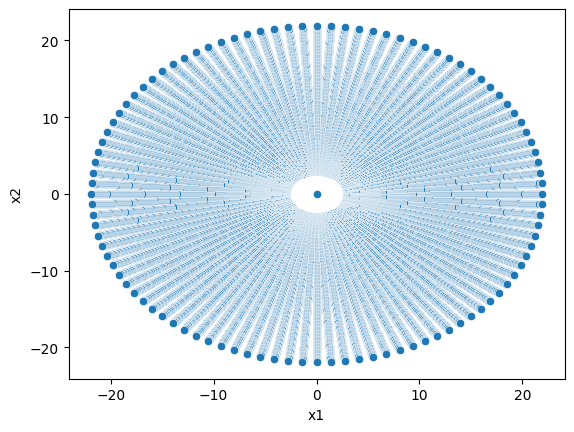

In [19]:
def robot_arm(theta1, theta2, r1, r2):
    ya = r1*np.cos(theta1) + r2*np.cos(theta1 + theta2)
    yb = r1*np.sin(theta1) + r2*np.sin(theta1 + theta2)
    return ya, yb

da = 2*np.pi/100
dr = 0.1
a1 = np.arange(0, 2*np.pi, da)
a2 = 0*a1 + np.pi
#aa1, aa2 = np.meshgrid(a1, a2)
r1_list = np.arange(2*myRobot.R2, 25, dr)
print(len(r1_list))

output = np.array([robot_arm(a1, a2, r, r2=myRobot.R2) for r in r1_list])

circles_df = pd.DataFrame(columns = ["x1", "x2"], index = range(len(output[:,0].flatten()+1)))

circles_df["x1"] = np.array(output[:,0]).flatten()
circles_df["x2"] = np.array(output[:,1]).flatten()
circles_df.loc[-1] = [0,0]

circles_df = cartesian_to_polar(circles_df, "x1", "x2", "r_x", "a_x")

sn.scatterplot(circles_df, x="x1", y="x2")
#circles_df.to_csv(f'data/x1_x2_polar_dr_{dr}_da_2pi_{100}.csv')